# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

#Helper function for loading pickle file
def load_pickle(file, folder='data'):
    with open(folder + "/" + file, mode='rb') as f:
        pickle_data = pickle.load(f)
    return pickle_data


#Helper function for saving pickle file
def write_pickle(data, file, folder='data'):
    with open(folder + "/" + file, mode='wb') as f:
        pickle.dump(data, f, protocol=pickle.HIGHEST_PROTOCOL)


train_original = load_pickle("train.p")
valid_original = load_pickle("valid.p")
test_original = load_pickle("test.p")

X_train_original, y_train_original = train_original['features'], train_original['labels']
X_valid_original, y_valid_original = valid_original['features'], valid_original['labels']
X_test_original, y_test_original = test_original['features'], test_original['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
import numpy as np

# Display dataset info
n_train = X_train_original.shape[0]
n_valid = X_valid_original.shape[0]
n_test = X_test_original.shape[0]
image_shape = X_train_original.shape[1]
n_classes = len(set(y_train_original))

print("Number of training examples =", n_train)
print("Number of validating examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validating examples = 4410
Number of testing examples = 12630
Image data shape = 32
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

### Road sign class samples distribution

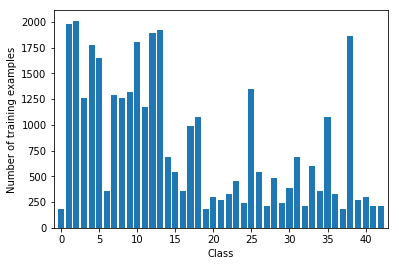

In [5]:
def display_sign_distribution(X, y):
    sign_classes, class_counts = np.unique(y, return_counts=True)
    # plt.bar(np.arange(sign_classes.shape[0]), class_counts, align='center')
    plt.bar(sign_classes, class_counts, align='center')
    plt.xlabel('Class')
    plt.ylabel('Number of training examples')
    plt.xlim([-1, sign_classes.shape[0]])
    plt.show()

display_sign_distribution(X_train_original, y_train_original)

As we can from graph we have unblanced dataset which could lead lead that accuracy of predictions might be lower for some classes.

### Analizing images brightness

Distribution images by 'Brightness'


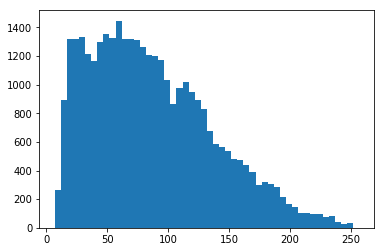

'Brightest' images


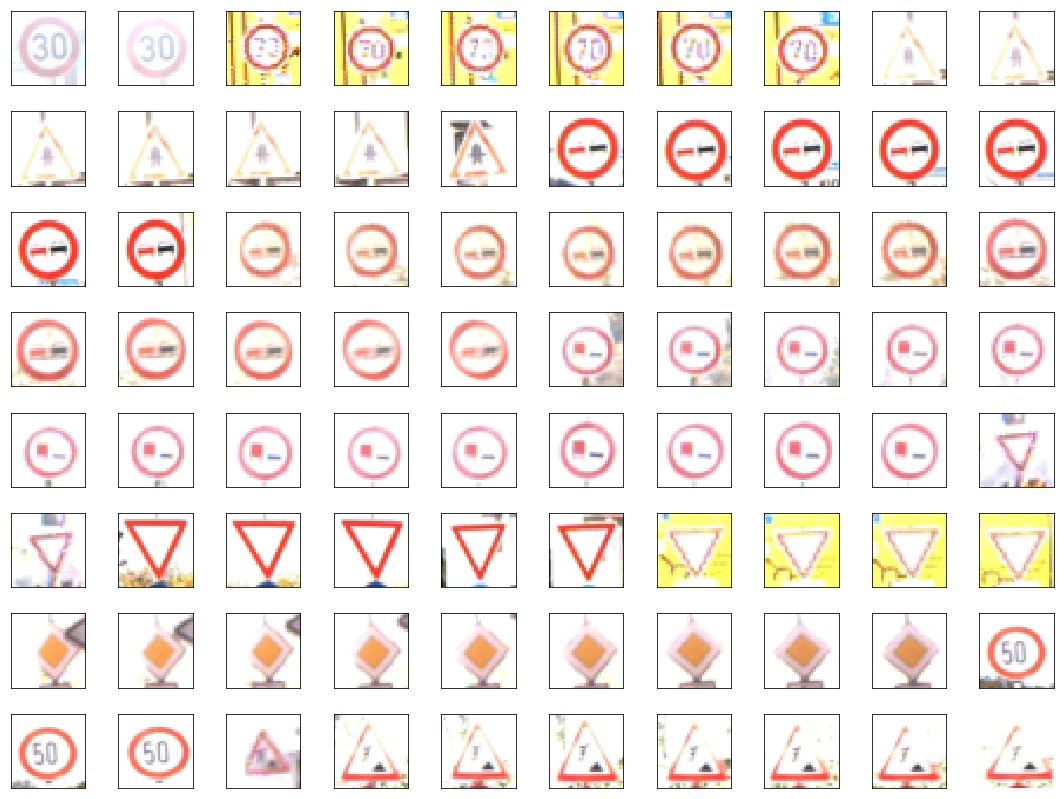

'Darkest' images


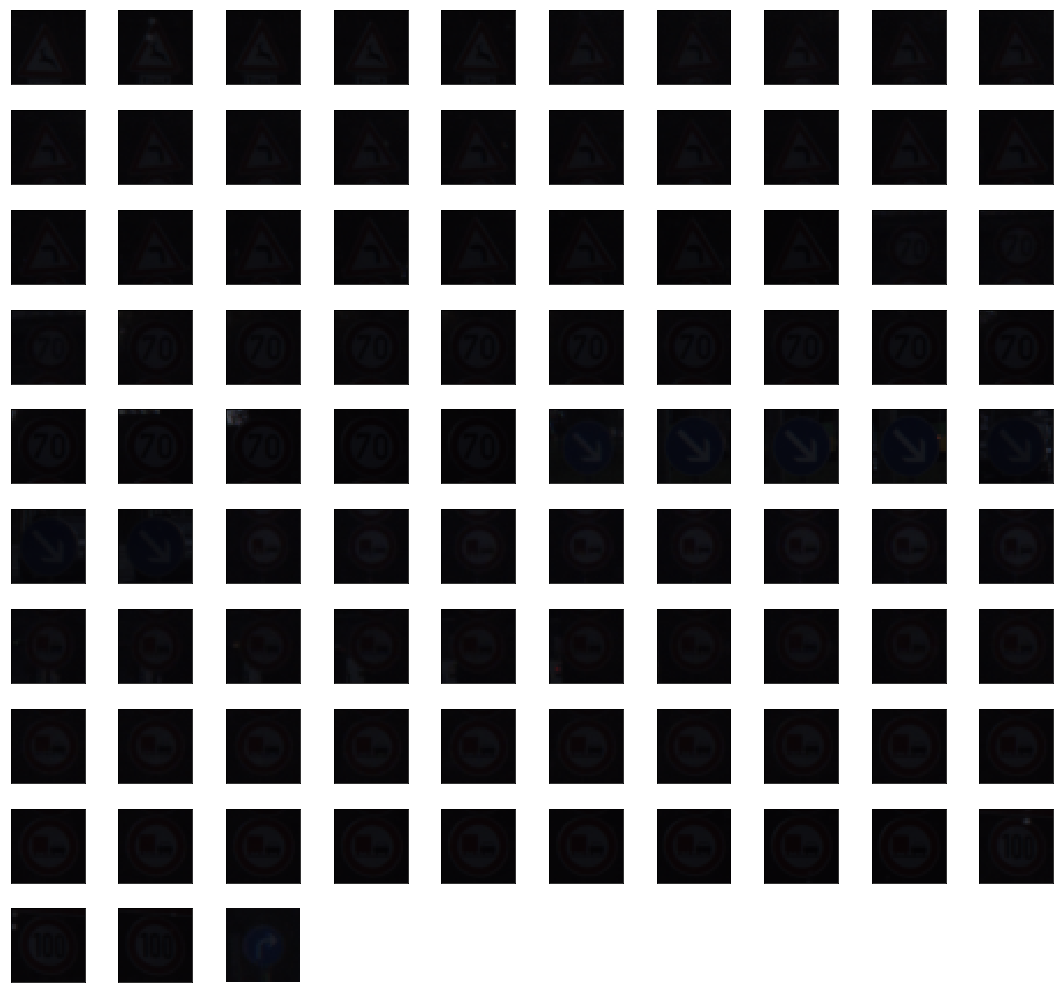

C:\Users\dmitr\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


'Brightest' images after applying adapt_histogram


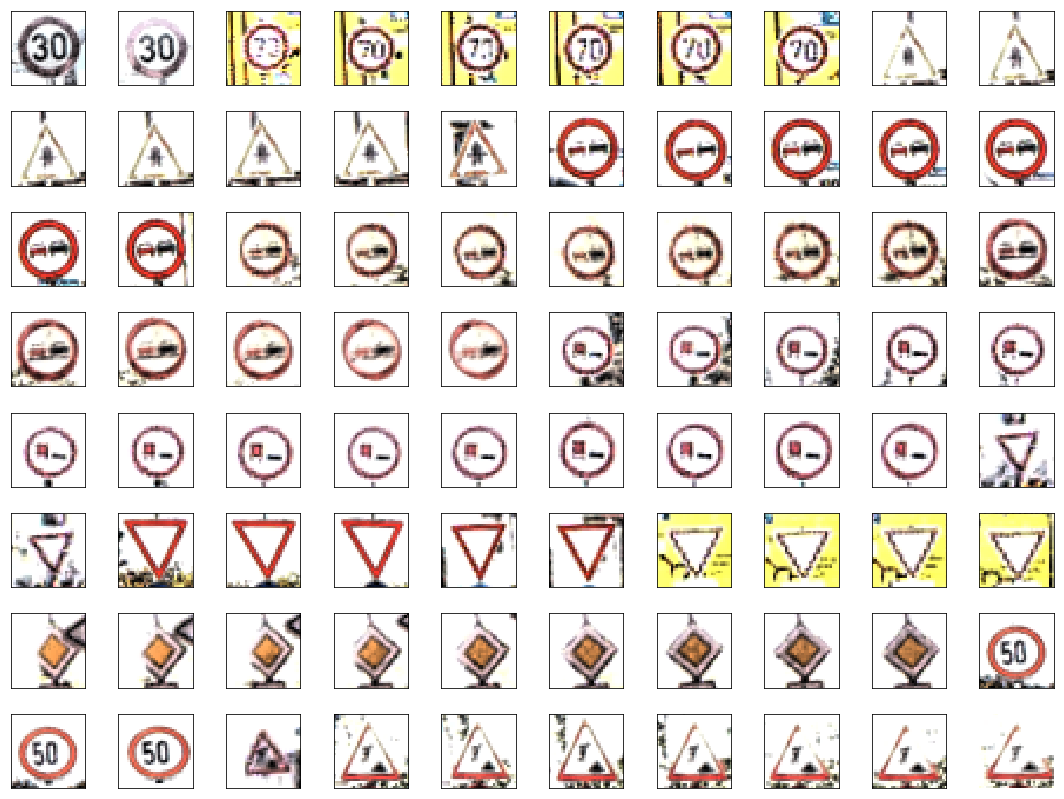

'Darkest' images after applying adapt_histogram


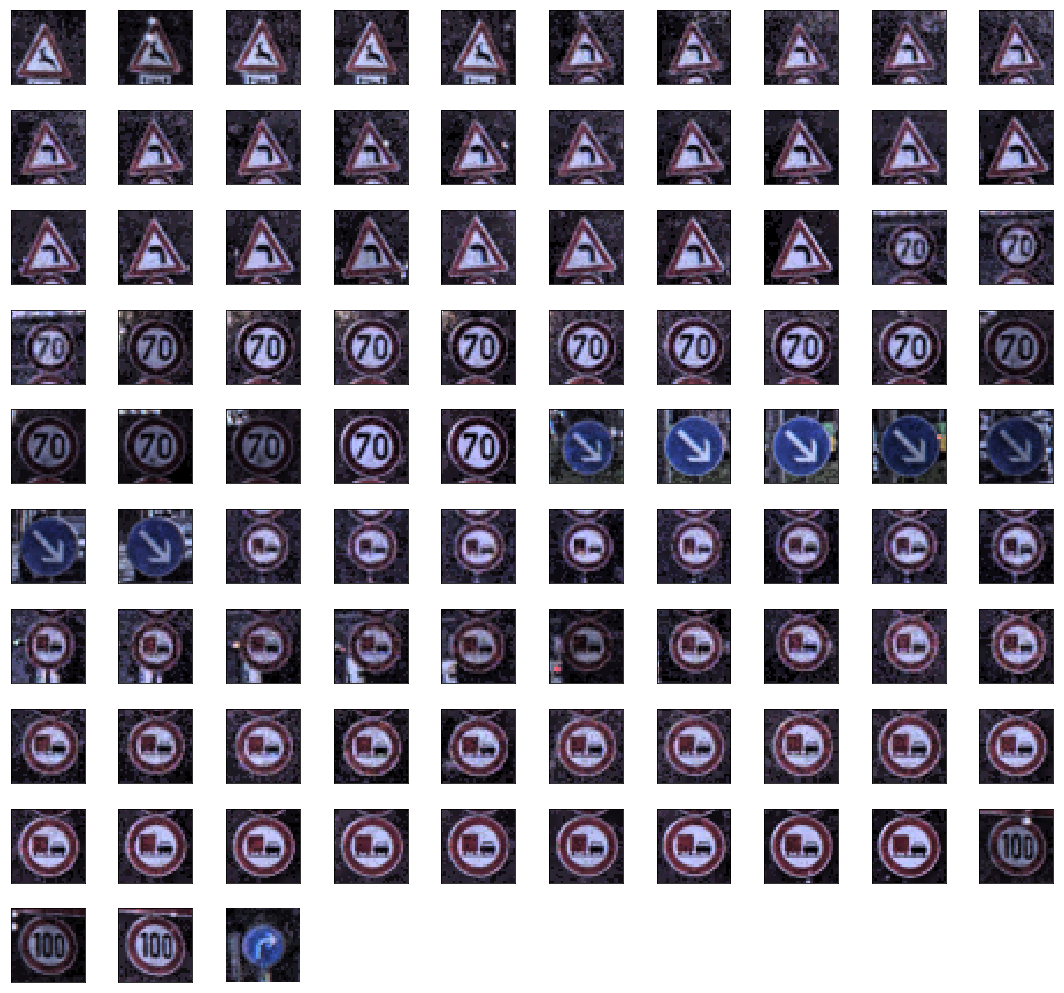

In [6]:
from PIL import ImageStat
from PIL import Image
import math
from skimage import transform, filters, exposure
import ctypes


def make_range_0_1(X):
    return (X / 255.).astype(np.float32)


def make_range_0_255(X):
    return (X * 255).astype(ctypes.c_ubyte)


def equalize_histogram(X):
    for i in range(X.shape[0]):
        X[i] = exposure.equalize_adapthist(X[i])
    return X


def convert_to_greyscale(X):
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]
    return X.reshape(X.shape + (1,))


#Display images in supplots as grid
def display_images_grid(images, columns = 10):
    rows = math.ceil(1.0*len(images)/columns)
    plt.figure(figsize=(1.5 * columns, 1.5 * rows))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(0, len(images)):
        plt.subplot(rows, columns, i + 1)
        if(images.shape[2] == 3):
            fig = plt.imshow(images[i])
        else:
            fig = plt.imshow(images[i], cmap= 'gray')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
    plt.axis('off')
    plt.show()

def display_brightness_distribution(X, dark_trashhold=10, bright_trashhold=240, binwidth = 5):
    brightness = []
    bright_images = []
    dark_images = []
    i = 0
    for im in X:
        img = Image.fromarray(im)
        stat = ImageStat.Stat(img)

        brightness.append(stat.mean[0])
        if stat.mean[0] < dark_trashhold:
            dark_images.append(im)
        if stat.mean[0] > bright_trashhold:
            bright_images.append(im)

    print("Distribution images by 'Brightness'")
    plt.hist(brightness, bins=np.arange(min(brightness), max(brightness) + binwidth, binwidth))
    plt.show()

    bright_images = np.array(bright_images)
    dark_images = np.array(dark_images)
    
    print("'Brightest' images")
    display_images_grid(bright_images)
    print("'Darkest' images")
    display_images_grid(dark_images)

    preprocessed_bright_images = equalize_histogram(make_range_0_1(bright_images))
    preprocessed_dark_images = equalize_histogram(make_range_0_1(dark_images))

    print("'Brightest' images after applying adapt_histogram")
    display_images_grid(preprocessed_bright_images)
    print("'Darkest' images after applying adapt_histogram")
    display_images_grid(preprocessed_dark_images)

display_brightness_distribution(X_train_original)


I'm a little bit ahead and touched preprocessing, but this visualisation shows that we can improve quality of dataset images by applying adap_histogram. Before it was impossible to see what signs are displayed on the darkest images

Sign class: Speed limit (20km/h); Samples:180


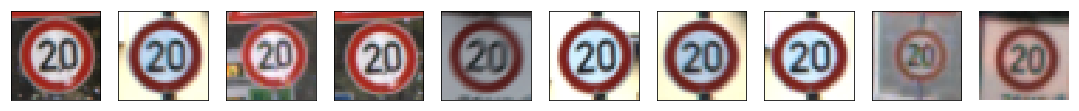

--------------------------------------------------------------------------------------

Sign class: Speed limit (30km/h); Samples:1980


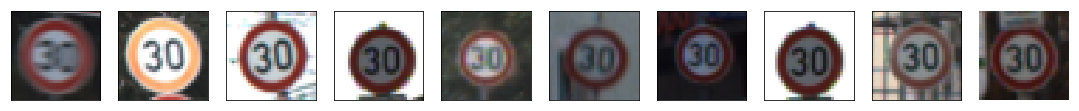

--------------------------------------------------------------------------------------

Sign class: Speed limit (50km/h); Samples:2010


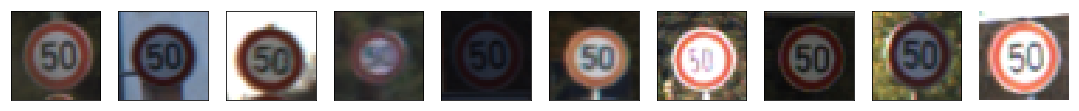

--------------------------------------------------------------------------------------

Sign class: Speed limit (60km/h); Samples:1260


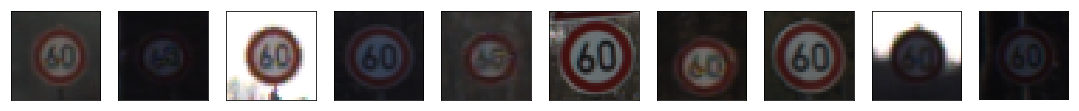

--------------------------------------------------------------------------------------

Sign class: Speed limit (70km/h); Samples:1770


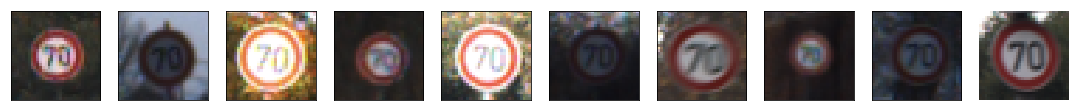

--------------------------------------------------------------------------------------

Sign class: Speed limit (80km/h); Samples:1650


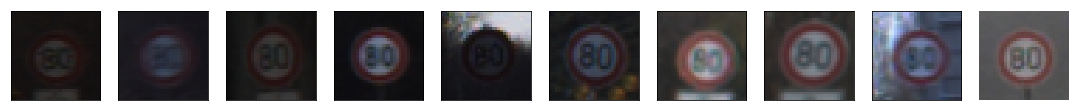

--------------------------------------------------------------------------------------

Sign class: End of speed limit (80km/h); Samples:360


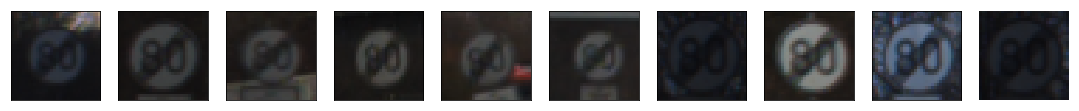

--------------------------------------------------------------------------------------

Sign class: Speed limit (100km/h); Samples:1290


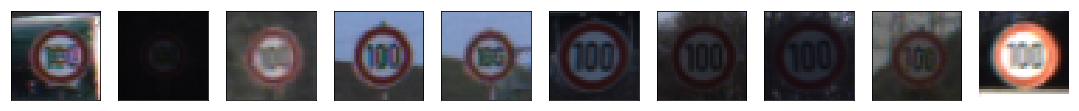

--------------------------------------------------------------------------------------

Sign class: Speed limit (120km/h); Samples:1260


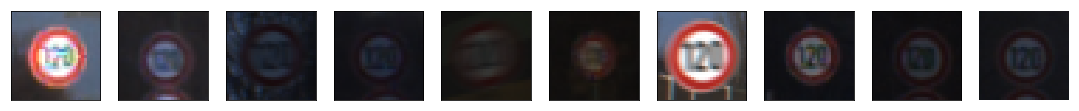

--------------------------------------------------------------------------------------

Sign class: No passing; Samples:1320


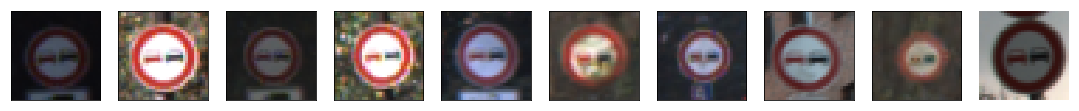

--------------------------------------------------------------------------------------

Sign class: No passing for vehicles over 3.5 metric tons; Samples:1800


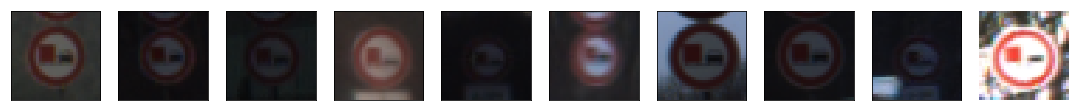

--------------------------------------------------------------------------------------

Sign class: Right-of-way at the next intersection; Samples:1170


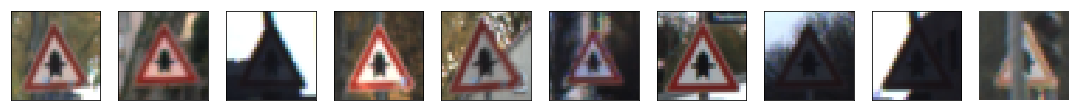

--------------------------------------------------------------------------------------

Sign class: Priority road; Samples:1890


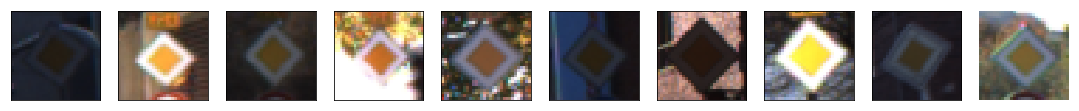

--------------------------------------------------------------------------------------

Sign class: Yield; Samples:1920


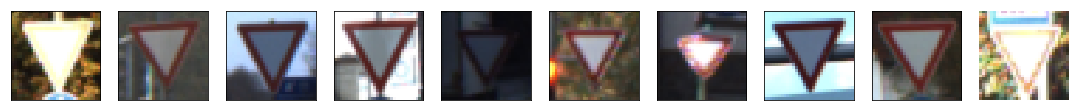

--------------------------------------------------------------------------------------

Sign class: Stop; Samples:690


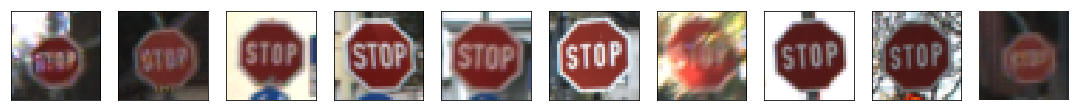

--------------------------------------------------------------------------------------

Sign class: No vehicles; Samples:540


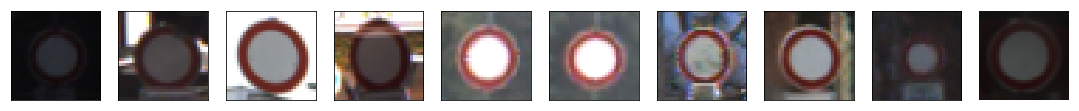

--------------------------------------------------------------------------------------

Sign class: Vehicles over 3.5 metric tons prohibited; Samples:360


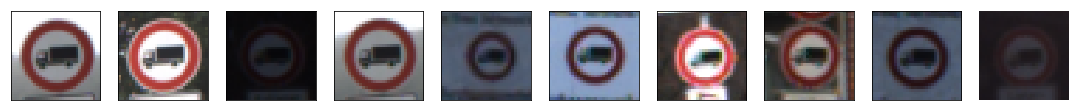

--------------------------------------------------------------------------------------

Sign class: No entry; Samples:990


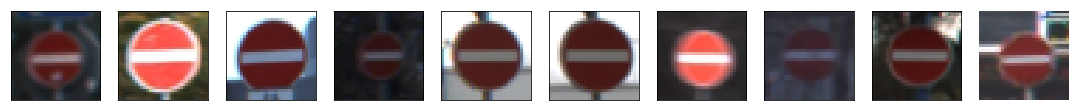

--------------------------------------------------------------------------------------

Sign class: General caution; Samples:1080


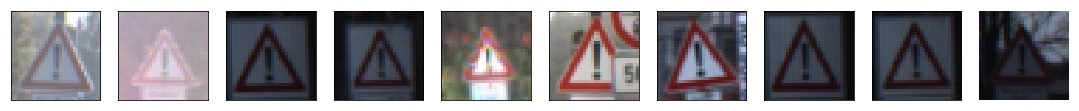

--------------------------------------------------------------------------------------

Sign class: Dangerous curve to the left; Samples:180


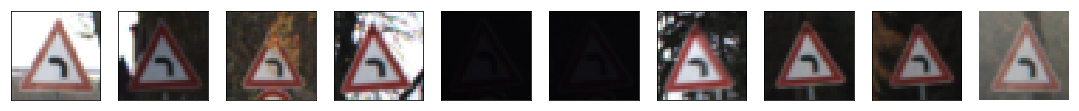

--------------------------------------------------------------------------------------

Sign class: Dangerous curve to the right; Samples:300


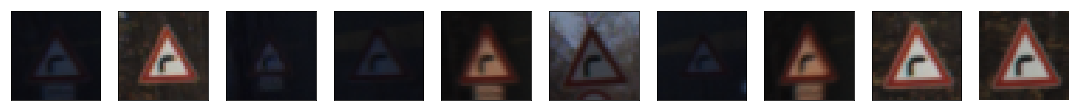

--------------------------------------------------------------------------------------

Sign class: Double curve; Samples:270


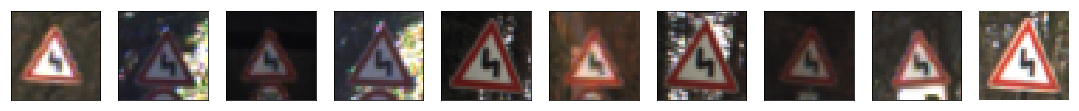

--------------------------------------------------------------------------------------

Sign class: Bumpy road; Samples:330


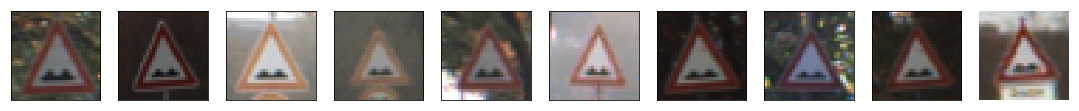

--------------------------------------------------------------------------------------

Sign class: Slippery road; Samples:450


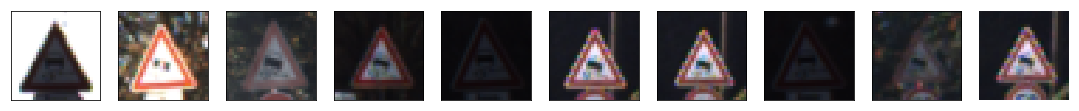

--------------------------------------------------------------------------------------

Sign class: Road narrows on the right; Samples:240


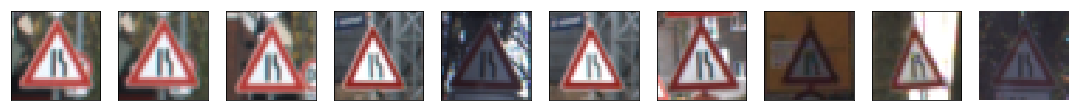

--------------------------------------------------------------------------------------

Sign class: Road work; Samples:1350


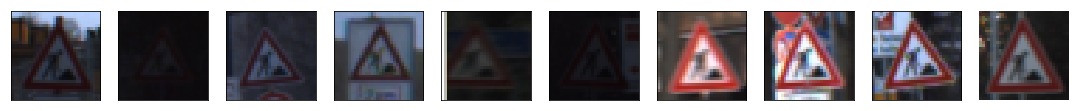

--------------------------------------------------------------------------------------

Sign class: Traffic signals; Samples:540


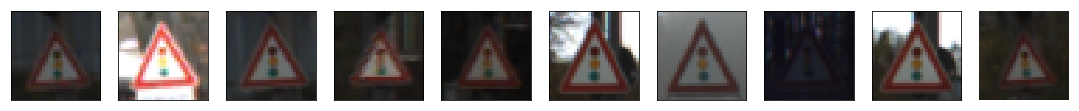

--------------------------------------------------------------------------------------

Sign class: Pedestrians; Samples:210


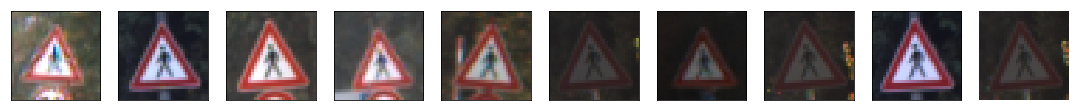

--------------------------------------------------------------------------------------

Sign class: Children crossing; Samples:480


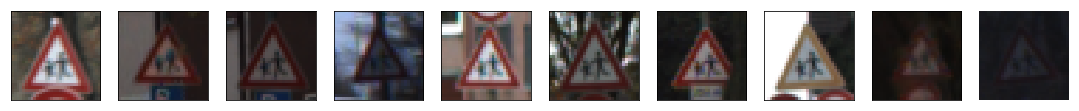

--------------------------------------------------------------------------------------

Sign class: Bicycles crossing; Samples:240


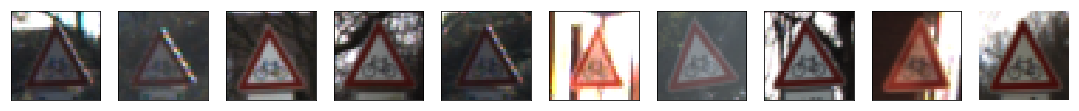

--------------------------------------------------------------------------------------

Sign class: Beware of ice/snow; Samples:390


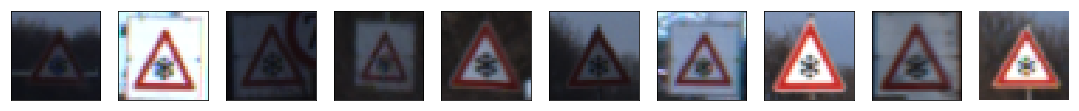

--------------------------------------------------------------------------------------

Sign class: Wild animals crossing; Samples:690


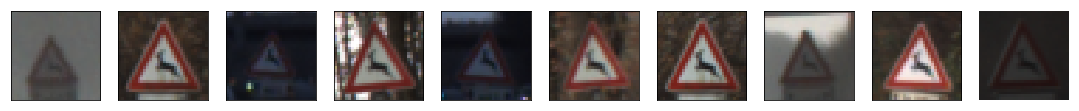

--------------------------------------------------------------------------------------

Sign class: End of all speed and passing limits; Samples:210


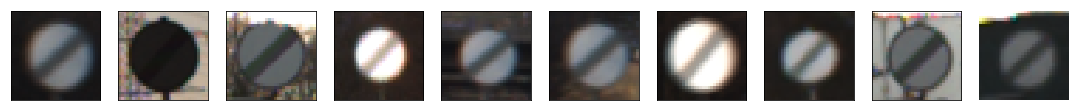

--------------------------------------------------------------------------------------

Sign class: Turn right ahead; Samples:599


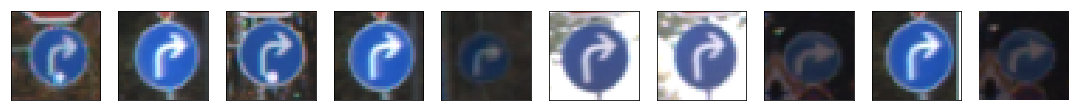

--------------------------------------------------------------------------------------

Sign class: Turn left ahead; Samples:360


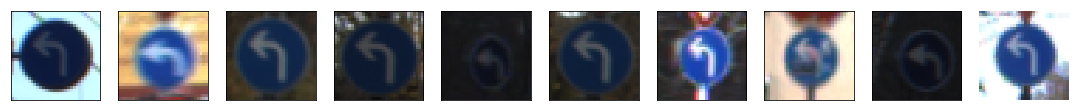

--------------------------------------------------------------------------------------

Sign class: Ahead only; Samples:1080


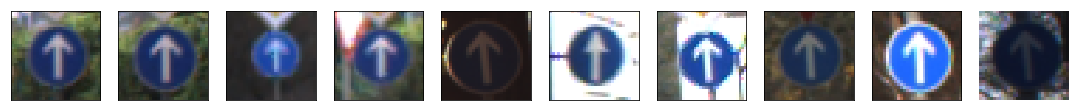

--------------------------------------------------------------------------------------

Sign class: Go straight or right; Samples:330


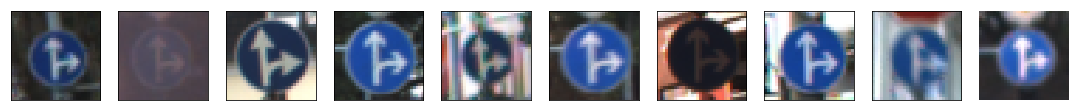

--------------------------------------------------------------------------------------

Sign class: Go straight or left; Samples:180


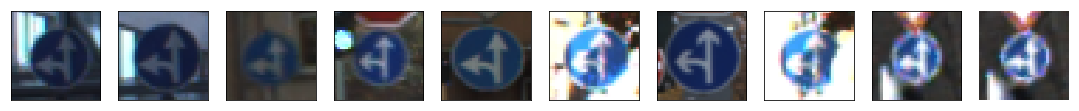

--------------------------------------------------------------------------------------

Sign class: Keep right; Samples:1860


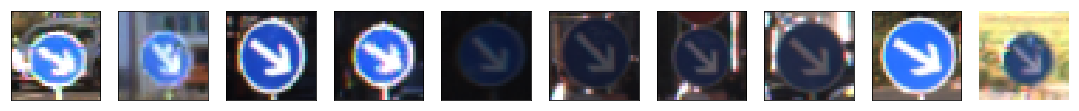

--------------------------------------------------------------------------------------

Sign class: Keep left; Samples:270


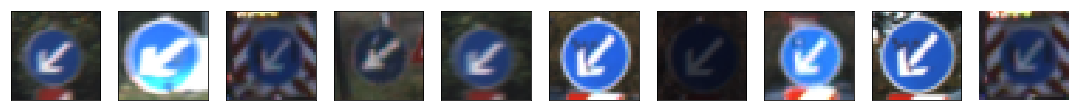

--------------------------------------------------------------------------------------

Sign class: Roundabout mandatory; Samples:300


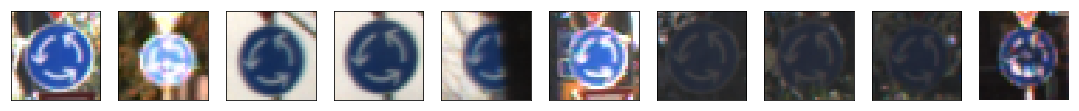

--------------------------------------------------------------------------------------

Sign class: End of no passing; Samples:210


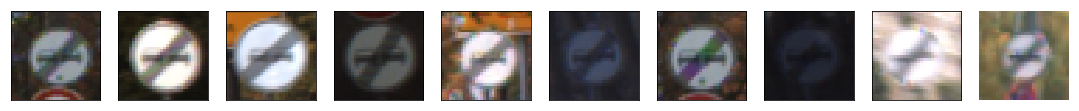

--------------------------------------------------------------------------------------

Sign class: End of no passing by vehicles over 3.5 metric tons; Samples:210


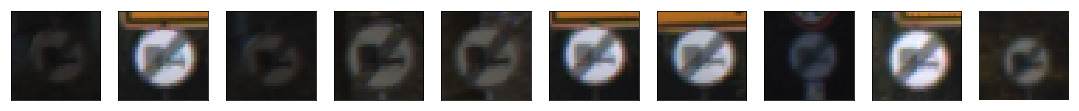

--------------------------------------------------------------------------------------



In [7]:
from pandas.io.parsers import read_csv
sign_names = read_csv("signnames.csv").values[:, 1]

import itertools
import random

def display_dataset(X, y, sign_names):
    sign_classes, class_indexes,  class_counts = np.unique(y, return_index=True, return_counts=True)

    for sign_class in range(0, len(sign_names)):
        selectors = [x == sign_class for x in y]
        # sign_y = list(itertools.compress(y, selectors))
        sign_X = np.array(list(itertools.compress(X, selectors)))
        random_indixes = random.sample(range(0, len(sign_X)), 10)
        print("Sign class: {}; Samples:{}".format(sign_names[sign_class], len(sign_X)))
        display_images_grid(sign_X[random_indixes])
        print("--------------------------------------------------------------------------------------\n")


display_dataset(X_train_original, y_train_original, sign_names)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [8]:
import ctypes

#Make pixel intensity from 0 to 1. Need for adapthist
def make_range_0_1(X):
    return (X / 255.).astype(np.float32)


#Make pixel intensity from 0 to 255. Use to decrease pickle file
def make_range_0_255(X):
    return (X * 255).astype(ctypes.c_ubyte)


#applying adaphist to histogram
def equalize_histogram(X):
    for i in range(X.shape[0]):
        X[i] = exposure.equalize_adapthist(X[i])
    return X


#Convert to greyscale image using Y channel
def convert_to_greyscale(X):
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]
    return X.reshape(X.shape + (1,))


def preprocess_dataset(input_file, output_file):
    pickle_data = load_pickle(input_file)
    X = pickle_data['features']
    # equalize_adapthist works quite long time so better to presave dataset
    X = make_range_0_1(X)
    X = equalize_histogram(X)
    # return pixel intencity range back to 0 - 255 to decrease pikle size
    X = make_range_0_255(X)
    pickle_data['features'] = X
    write_pickle(pickle_data, output_file)

if False:
    print("Preprocess train dataset")
    preprocess_dataset("train.p", "preprocessed_train.p")
    print("Preprocess validation dataset")
    preprocess_dataset("valid.p", "preprocessed_valid.p")
    print("Preprocess test dataset")
    preprocess_dataset("test.p", "preprocessed_test.p")
    print("Preprocess finished")


As some preprocessing like applying adapthist and dataset augmentation use quite a lot of time I save preprocessed data to the pickle for reusing it later. First I apply adapthist to original datasets. And after that I equalize samples for different sign classes, with augmentation. 
While I was playing with basic LeNet5 it showed improvement when using hystogram normalization and converting to greyscale. Also Yann LeCun stated in his paper that they have improvement after converting images to greyscale.

### Dataset augmentation 

For increase samples in our dataset and equalize number of samples for each class can be use next techniques:
1) Some signs are simmetrical so we can  flip them horizontally or vertically other could be flipped but need class exchange
2) Some transformations could be applied: rotation, zooming, sheering 


Original images:


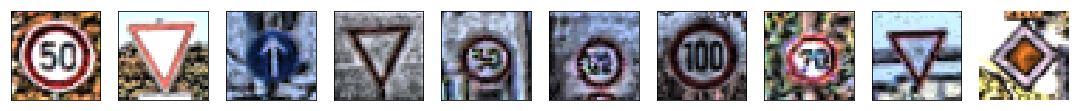

Augmented images:


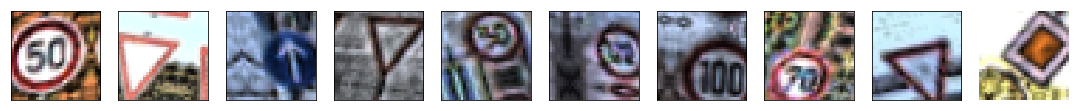

In [9]:
def flip_vertically(signclasses, X, y):
    for c in signclasses:
        X = np.append(X, X[y == c][:, ::-1, :, :], axis=0)
        y = np.append(y, np.full((X.shape[0] - y.shape[0]), c, dtype=int))
    return (X, y)


def flip_horizontally(signclasses, X, y):
    for c in signclasses:
        X = np.append(X, X[y == c][:, :, ::-1, :], axis=0)
        y = np.append(y, np.full((X.shape[0] - y.shape[0]), c, dtype=int))
    return (X, y)


def flip_vertically_and_change_class(signclasses, X, y):
    X_flipped = np.empty([0, X.shape[1], X.shape[2], X.shape[3]], dtype=X.dtype)
    y_flipped = np.empty([0], dtype=y.dtype)

    for c in signclasses:
        X_flipped = np.append(X_flipped, X[y == c[0]][:, :, ::-1, :], axis=0)
        y_flipped = np.append(y_flipped, np.full((X_flipped.shape[0] - y_flipped.shape[0]), c[1], dtype=int))

    X_flipped = np.append(X_flipped, X, axis=0)
    y_flipped = np.append(y_flipped, y, axis=0)

    return (X_flipped, y_flipped)


def flip_signs(X, y):
    flip_vertically_classes = [1, 5, 12, 15, 17]

    flip_horizontally_classes = [11, 12, 13, 15, 17, 18, 22, 26, 30, 35]

    flip_vertically_and_change_class_classes = [
        [19, 20],
        [33, 34],
        [36, 37],
        [38, 39],
        [20, 19],
        [34, 33],
        [37, 36],
        [39, 38]]

    X_flipped, y_flipped = flip_vertically(flip_vertically_classes, X, y)
    X_flipped, y_flipped = flip_horizontally(flip_horizontally_classes, X_flipped, y_flipped)
    X_flipped, y_flipped = flip_vertically_and_change_class(flip_vertically_and_change_class_classes, X_flipped,
                                                            y_flipped)
    return (X_flipped, y_flipped)


def augment_dataset(input_file, output_file, extend_by_flipping=True, n=0):
    pickle_data = load_pickle(input_file)
    X = pickle_data['features']
    y = pickle_data['labels']
    make_range_0_1(X)
    if extend_by_flipping:
        X, y = flip_signs(X, y)
    X, y = equalize_number_of_classes(X, y)
    pickle_data['features'] = X
    pickle_data['labels'] = y
    make_range_0_255(X)
    write_pickle(pickle_data, output_file)


def generate_n_samples(n, X):
    full_num = int(n / len(X) - 1);

    rest_num = n - (full_num + 1) * len(X);

    X_additional = np.empty([0, X.shape[1], X.shape[2], X.shape[3]], dtype=X.dtype)

    for i in range(full_num):
        X_additional = np.append(X_additional, augment_samples(X), axis=0)

    if rest_num > 0:
        random_indices = random.sample(range(0, len(X)), rest_num)
        X_additional = np.append(X_additional, augment_samples(X[random_indices]), axis=0)

    return X_additional

    # extend dataset


def fast_warp(img, tf, output_shape=(32, 32), mode='reflect'):
    """
    This wrapper function is about five times faster than skimage.transform.warp, for our use case.
    """
    img_wf = np.empty((output_shape[0], output_shape[1], 3), dtype='float32')
    for k in range(3):
        img_wf[..., k] = transform._warps_cy._warp_fast(img[..., k], tf.params, output_shape=output_shape, mode=mode)
    return img_wf


def get_augment_tform(pixels, rotate, translation, zoom_out, zoom_in, shear):
    # random rotations betweein -10 and 10 degrees
    dorotate = random.randint(-rotate, rotate)

    # random translations
    trans_1 = random.randint(-translation, translation)
    trans_2 = random.randint(-translation, translation)

    # random zooms
    zoom = random.uniform(zoom_out, zoom_in)

    # shearing
    shear_deg = random.uniform(-shear, shear)

    # set the transform parameters for skimage.transform.warp
    # have to shift to center and then shift back after transformation otherwise
    # rotations will make image go out of frame
    center_shift = np.array((pixels, pixels)) / 2. - 0.5
    tform_center = transform.SimilarityTransform(translation=-center_shift)
    tform_uncenter = transform.SimilarityTransform(translation=center_shift)

    tform_aug = transform.AffineTransform(rotation=np.deg2rad(dorotate),
                                          scale=(1 / zoom, 1 / zoom),
                                          shear=np.deg2rad(shear_deg),
                                          translation=(trans_1, trans_2))

    return tform_center + tform_aug + tform_uncenter

def augment_samples(X, pixels=32, rotate=7, translation=7, zoom_out=0.9, zoom_in=1.2, shear=7, each_different = True,rate=1.0):
    X_augmented = np.empty([0, X.shape[1], X.shape[2], X.shape[3]], dtype=X.dtype)

    tform = get_augment_tform(pixels, rotate, translation, zoom_out, zoom_in, shear)

    for x in X:
        if each_different:
            tform = get_augment_tform(pixels, rotate, translation, zoom_out, zoom_in, shear)
        X_augmented = np.append(X_augmented, [fast_warp(x, tform, output_shape=(pixels, pixels))], axis=0)

    return X_augmented

def equalize_number_of_classes(X, y, n=0):
    max_n = n

    for c in range(43):
        n = len(X[y == c])
        if n > max_n:
            max_n = n

    for c in range(43):
        X = np.append(X, generate_n_samples(max_n, X[y == c]), axis=0)
        y = np.append(y, np.full((X.shape[0] - y.shape[0]), c, dtype=int))
        pass

    return X, y


#It would take 40m to get this done
if False:
    augment_dataset("preprocessed_train.p", "aug2_train.p", extend_by_flipping=True, n=16000)
    augment_dataset("preprocessed_valid.p", "aug2_valid.p", extend_by_flipping=True, n=4000)
    

preprocessed_train = load_pickle('preprocessed_train.p')

def display_augmentation(X):
    random_indixes = random.sample(range(0, len(X)), 10)
    print("Original images:")
    X = make_range_0_1(X)
    display_images_grid(X[random_indixes])
    print("Augmented images:")
    X_aug = augment_samples(X[random_indixes], rotate=10, translation=7, shear=15)
    display_images_grid(X_aug)

 
display_augmentation(preprocessed_train['features'])


After equalizing train and validation dataset 

In [10]:
# Display dataset info
aug_train = load_pickle('aug_train.p')
aug_valid = load_pickle('aug_valid.p')

aug_n_train = aug_train['features'].shape[0]
aug_n_valid = aug_valid['features'].shape[0]
n_classes = len(set(aug_train['labels']))

print("Number of augmented training examples =", aug_n_train)
print("Number of validating examples =", aug_n_valid)
print("Number of training samples for each class =", aug_n_train/n_classes)
print("Number of validation samples for each class =", aug_n_valid/n_classes)

Number of augmented training examples = 86430
Number of validating examples = 10320
Number of training samples for each class = 2010.0
Number of validation samples for each class = 240.0


### Model Architecture

To make testing parameters of network easier was created container for parameters and some helpers.

In [11]:
from collections import namedtuple

Parameters = namedtuple('Parameters', [
        # Data parameters
        'color_channels', 'num_classes',
        # Preprocessing
        'range_0_1', 'convert_to_greyscale',
        # Training parameters
        'batch_size', 'max_epochs', 'train_on_samples_rate',
        # Optimisations
        'learning_rate',
        'l2_reg_enabled', 'l2_lambda',
        'augment', 'augment_rate',
        'early_stopping_enabled', 'early_stopping_steps',
        # Saving and loading 
        'resume_training', 'save_file', 'load_save',
        # Layers architecture
        'conv1_kernel_size', 'conv1_depth', 'conv1_pool_stride', 'conv1_keep_prob',
        'conv2_kernel_size', 'conv2_depth', 'conv2_pool_stride', 'conv2_keep_prob',
        'conv3_kernel_size', 'conv3_depth', 'conv3_pool_stride', 'conv3_keep_prob',
        'full4_size', 'full4_keep_prob', 'full4_connect_all',
        'full5_size', 'full5_keep_prob'
    ])

import tensorflow as tf

def fully_connected(input, size):
    weights = tf.get_variable( 'weights', shape = [input.get_shape()[1], size],
                               initializer = tf.contrib.layers.xavier_initializer())
    biases = tf.get_variable( 'biases', shape = [size], initializer = tf.constant_initializer(0.0))
    return tf.matmul(input, weights) + biases

def convolution(input, kernel_size, depth):
    weights = tf.get_variable( 'weights', shape = [kernel_size, kernel_size, input.get_shape()[3], depth],
        initializer = tf.contrib.layers.xavier_initializer())
    biases = tf.get_variable( 'biases', shape = [depth], initializer = tf.constant_initializer(0.0))
    conv = tf.nn.conv2d(input, weights, strides = [1, 1, 1, 1], padding = 'SAME')
    return tf.nn.relu(conv + biases)


def max_pool(input, pool_stride):
    return tf.nn.max_pool(input, ksize = [1, pool_stride, pool_stride, 1],
                          strides = [1, pool_stride, pool_stride, 1], padding = 'SAME')

Network could have all convolutions layers to be connected to fully contected layer or only last one, also it could have one or two hidden layers.

In [12]:
def network(params, x, is_training):
    # Need for visualizing first layer
    with tf.variable_scope('conv1'):
        conv1 = convolution(x, params.conv1_kernel_size, params.conv1_depth)

    with tf.variable_scope('pool1'):
        pool1 = max_pool(conv1, params.conv2_pool_stride)
        pool1 = tf.cond(is_training, lambda: tf.nn.dropout(pool1, keep_prob=params.conv1_keep_prob), lambda: pool1)

    with tf.variable_scope('conv2'):
        conv2 = convolution(pool1, params.conv2_kernel_size, params.conv2_depth)

    with tf.variable_scope('pool2'):
        pool2 = max_pool(conv2, params.conv2_pool_stride)
        pool2 = tf.cond(is_training, lambda: tf.nn.dropout(pool2, keep_prob=params.conv2_keep_prob), lambda: pool2)

    with tf.variable_scope('conv3'):
        conv3 = convolution(pool2, params.conv3_kernel_size, params.conv3_depth)

    with tf.variable_scope('pool3'):
        pool3 = max_pool(conv3, params.conv3_pool_stride)
        pool3 = tf.cond(is_training, lambda: tf.nn.dropout(pool3, keep_prob=params.conv3_keep_prob), lambda: pool3)

    # Fully connected
    if params.full4_connect_all:
        pool1 = max_pool(pool1, pool_stride=4)
        shape = pool1.get_shape().as_list()
        pool1 = tf.reshape(pool1, [-1, shape[1] * shape[2] * shape[3]])

        # 2nd stage output
        pool2 = max_pool(pool2, pool_stride=2)
        shape = pool2.get_shape().as_list()
        pool2 = tf.reshape(pool2, [-1, shape[1] * shape[2] * shape[3]])

        # 3rd stage output
        shape = pool3.get_shape().as_list()
        pool3 = tf.reshape(pool3, [-1, shape[1] * shape[2] * shape[3]])

        flattened = tf.concat([pool1, pool2, pool3], 1)
    else:
        flattened = tf.contrib.layers.flatten(conv2)

    with tf.variable_scope('full4'):
        full4 = fully_connected(flattened, size=params.full4_size)
        full4 = tf.nn.relu(full4)
        full4 = tf.cond(is_training, lambda: tf.nn.dropout(full4, keep_prob=params.full4_keep_prob), lambda: full4)

    if params.full5_size == 0:
        with tf.variable_scope('out'):
            logits = fully_connected(full4, size=params.num_classes)
    else:
        with tf.variable_scope('full5'):
            full5 = fully_connected(full4, size=params.full5_size)
            full5 = tf.nn.relu(full5)
            full5 = tf.cond(is_training, lambda: tf.nn.dropout(full5, keep_prob=params.full5_keep_prob), lambda: full5)
        with tf.variable_scope('out'):
            logits = fully_connected(full5, size=params.num_classes)
    return logits

In [16]:
#Display first convolution layer weights
def display_conv_layer():
    print("Visualisation of first cnn layer weights")
    with tf.variable_scope('conv1'):
        tf.get_variable_scope().reuse_variables()
        weights = tf.get_variable('weights')

        arr = weights.eval()
        i = 0
        # Get each 5x5 filter from the 5x5x1x32 array
        images = []
        for filter_ in range(arr.shape[3]):
            # Get the 5x5x1 filter:
            extracted_filter = arr[:, :, :, filter_]

            # Get rid of the last dimension (hence get 5x5):
            extracted_filter = np.squeeze(extracted_filter)
            images.append(extracted_filter)
        display_images_grid(np.array(images), columns=5)


from sklearn.utils import shuffle

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [17]:
from sklearn.utils import shuffle


def train_network(params, X_train, y_train, X_valid, y_valid, X_test, y_test):
    # graph = tf.Graph()
    # with graph.as_default():
    x = tf.placeholder(tf.float32, (None, 32, 32, params.color_channels))
    y = tf.placeholder(tf.int32, (None))
    is_training = tf.placeholder(tf.bool)

    one_hot_y = tf.one_hot(y, 43)

    logits = network(params, x, is_training)
    if params.l2_reg_enabled:
        if params.full5_size == 0:
            l2_loss_layer = 'full4'
            with tf.variable_scope(l2_loss_layer, reuse=True):
                l2_loss = tf.nn.l2_loss(tf.get_variable('weights'))
        else:
            l2_loss_layer = 'full4'
            with tf.variable_scope(l2_loss_layer, reuse=True):
                l2_loss = tf.nn.l2_loss(tf.get_variable('weights'))
            l2_loss_layer = 'full5'
            with tf.variable_scope(l2_loss_layer, reuse=True):
                l2_loss = l2_loss + tf.nn.l2_loss(tf.get_variable('weights'))

    else:
        l2_loss = 0

    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
    loss_operation = tf.reduce_mean(cross_entropy) + params.l2_lambda * l2_loss

    predictions = tf.nn.softmax(logits)

    optimizer = tf.train.AdamOptimizer(learning_rate = params.learning_rate)

    training_operation = optimizer.minimize(loss_operation)

    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    saver = tf.train.Saver(tf.all_variables())

    def evaluate(params, X_data, y_data, is_training_):
        num_examples = len(X_data)
        sess = tf.get_default_session()
        p = []
        sce = []
        for offset in range(0, num_examples, params.batch_size):
            batch_x, batch_y = X_data[offset:offset + params.batch_size], y_data[offset:offset + params.batch_size]
            [p_batch, sce_batch] = sess.run([predictions, cross_entropy], feed_dict={x: batch_x, y: batch_y,
                                                                                      is_training: is_training_})

            p.extend(p_batch)
            sce.extend(sce_batch)

        p = np.array(p)
        sce = np.array(sce)
        accuracy = 100.0 * np.sum(np.argmax(p, 1) == y_data) / p.shape[0]
        loss = np.mean(sce)
        return (accuracy, loss)

    def predictions_count(params, X_data, y_data):
        
        signs_class_accuracy = []
        signs_class_counts = []

        max_sign_count = 0

        for sign_class in range(0, 43):
            selectors = [x == sign_class for x in y_data]
            sign_X_data = list(itertools.compress(X_data, selectors))
            sign_y_data = list(itertools.compress(y_data, selectors))

            if max_sign_count < len(sign_y_data):
                max_sign_count = len(sign_y_data)

            sign_validation_accuracy, sign_validation_loss = evaluate(params, sign_X_data, sign_y_data, False)
            signs_class_counts.append(len(sign_y_data))
            signs_class_accuracy.append(sign_validation_accuracy)

        # import matplotlib.pyplot as plt
        print("Relationship between test samples and accuracy")
        plt.plot(signs_class_counts, signs_class_accuracy, 'ro')
        plt.axis([0, max_sign_count, 0, 100])
        # plt.savefig("test2.png")
        plt.show()

    with tf.Session() as sess:

        num_examples = len(X_train)

        print("Training...")
        print()
        loss_train = []
        loss_valid = []
        accuracy_valid = []
        accuracy_train = []
        epoch = 0
        max_validation_accuracy = 0.
        min_validation_loss = 100.
        steps_without_improving = 0

        if params.load_save:
            network_data= load_pickle(params.save_file + ".p", folder="net")
            loss_train = network_data['loss_train']
            loss_valid = network_data['loss_valid']
            accuracy_valid = network_data['accuracy_valid']
            accuracy_train = network_data['accuracy_train']
            epoch = network_data['epoch']
            max_validation_accuracy  = network_data['max_validation_accuracy']
            min_validation_loss = network_data['min_validation_loss']
            steps_without_improving = network_data['steps_without_improving']

            saver.restore(sess, "net/" + params.save_file)
        else:
            sess.run(tf.global_variables_initializer())

        if params.resume_training:
            for i in range(epoch, params.max_epochs):
                X_train, y_train = shuffle(X_train, y_train)

                for offset in range(0, int(num_examples*params.train_on_samples_rate), params.batch_size):
                    end = offset + params.batch_size
                    batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                    sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, is_training: True})

                validation_accuracy, validation_loss = evaluate(params, X_valid, y_valid, False)
                train_accuracy, train_loss = evaluate(params, X_train, y_train, False)
                accuracy_valid.append(validation_accuracy)
                accuracy_train.append(train_accuracy)
                loss_valid.append(validation_loss)
                loss_train.append(train_loss)

                ####
                if params.early_stopping_enabled:
                    if validation_loss < min_validation_loss:
                        min_validation_loss = validation_loss
                        steps_without_improving = 0
                        saver.save(sess, "net/" + params.save_file)

                        network_data = {'loss_train': loss_train, 'loss_valid': loss_valid,
                                        'accuracy_valid': accuracy_valid, 'accuracy_train': accuracy_train,
                                        'epoch': epoch, 'max_validation_accuracy': max_validation_accuracy,
                                        'min_validation_loss': min_validation_loss,
                                        'steps_without_improving': steps_without_improving}

                        write_pickle(network_data, params.save_file + ".p", folder="net")

                    else:
                        steps_without_improving += 1

                    if steps_without_improving > params.early_stopping_steps:
                        saver.restore(sess, "net/" + params.save_file)
                        break

                print("EPOCH {} ...".format(i + 1))
                print("Train Accuracy = {:.3f}".format(train_accuracy))
                print("Train Loss = {:.3f}".format(train_loss))
                print("Validation Accuracy = {:.3f}".format(validation_accuracy))
                print("Validation Loss = {:.3f}".format(validation_loss))

                print()
                epoch = i+1



        print("Final results")
        train_accuracy, train_loss = evaluate(params, X_train, y_train, False)
        print("Train `Accuracy = {:.3f}".format(train_accuracy))
        validation_accuracy, validation_loss = evaluate(params, X_valid, y_valid, False)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        test_accuracy, test_loss = evaluate(params, X_test, y_test, False)
        print("Test Accuracy = {:.3f}".format(test_accuracy))
        print("Model saved")

        display_conv_layer()
        predictions_count(params, X_test, y_test)

Instructions for updating:
Please use tf.global_variables instead.
Training...

Final results
Train `Accuracy = 99.994
Validation Accuracy = 98.889
Test Accuracy = 97.680
Model saved
Wisualisation of first cnn layer weights


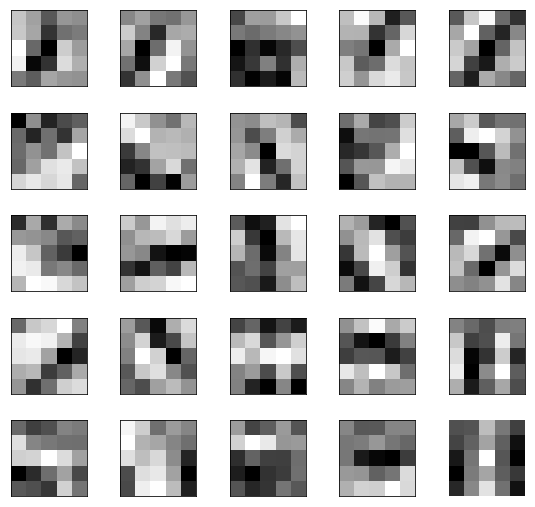

Relationship between test samples and accuracy


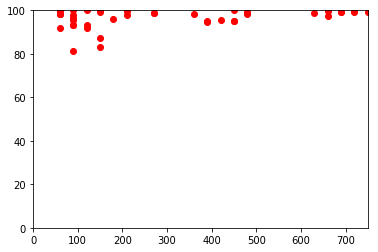

In [18]:
params = Parameters(color_channels=1, num_classes=43, convert_to_greyscale=True, range_0_1=True, max_epochs=500,
                    batch_size=256,  train_on_samples_rate=1.0, learning_rate=0.001, early_stopping_steps=10,
                    early_stopping_enabled=True, save_file='network_cnn', load_save=True, resume_training=False, augment=True,
                    augment_rate=0.5, l2_lambda=0.01, l2_reg_enabled=True,
                    conv1_kernel_size=5, conv1_depth=25, conv1_pool_stride=2, conv1_keep_prob=0.9,
                    conv2_kernel_size=5, conv2_depth=50, conv2_pool_stride=2, conv2_keep_prob=0.8,
                    conv3_kernel_size=5, conv3_depth=100, conv3_pool_stride=2, conv3_keep_prob=0.7,
                    full4_size=500, full4_keep_prob=0.5, full4_connect_all=True,
                    full5_size=200, full5_keep_prob=0.5)


def preprocess(params, X):
    if params.convert_to_greyscale:
        X = convert_to_greyscale(X)

    if params.range_0_1:
        X = make_range_0_1(X)

    return X

train = load_pickle('preprocessed_train.p')
valid = load_pickle('preprocessed_valid.p')
test = load_pickle('preprocessed_test.p')

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

X_train = preprocess(params, X_train)
X_valid = preprocess(params, X_valid)
X_test = preprocess(params, X_test)

train_network(params, X_train, y_train, X_valid, y_valid, X_test, y_test)


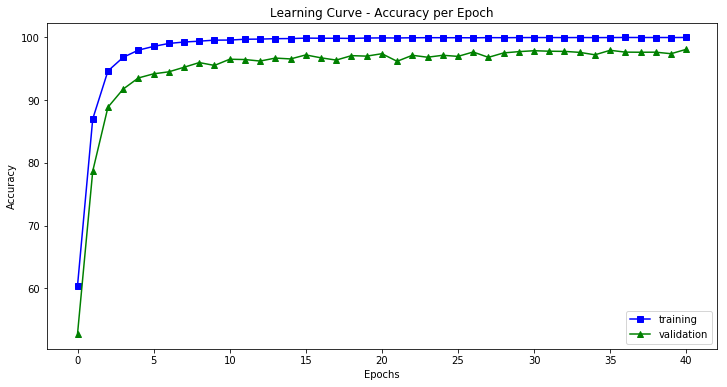

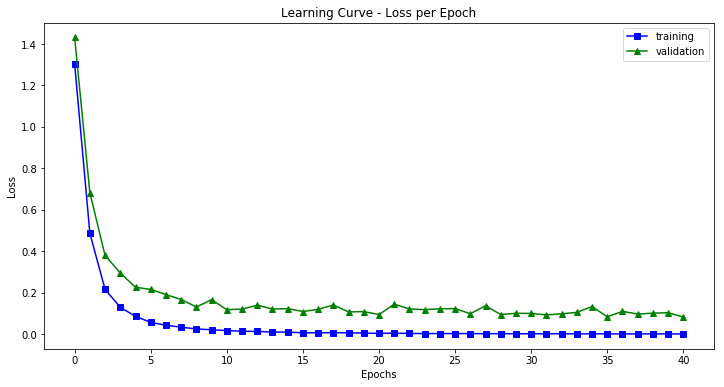

In [19]:
def plot_accuracy_loss(params):
    network_data = load_pickle(params.save_file + ".p", folder="net")
    loss_train = network_data['loss_train']
    loss_valid = network_data['loss_valid']
    accuracy_valid = network_data['accuracy_valid']
    accuracy_train = network_data['accuracy_train']
    epoch = network_data['epoch']
    max_validation_accuracy = network_data['max_validation_accuracy']
    min_validation_loss = network_data['min_validation_loss']
    steps_without_improving = network_data['steps_without_improving']

    epoches = range(0, epoch+1)

    plt.figure(figsize=(12,6))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve - Accuracy per Epoch')
    plt.plot(epoches, accuracy_train, 'bs-', label='training')
    plt.plot(epoches, accuracy_valid, 'g^-', label='validation')
    plt.legend(loc='lower right')
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Learning Curve - Loss per Epoch')
    plt.plot(epoches, loss_train, 'bs-', label='training')
    plt.plot(epoches, loss_valid, 'g^-', label='validation')
    plt.legend(loc='upper right')
    plt.show()

plot_accuracy_loss(params)


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

5
New Images loaded successfully!!


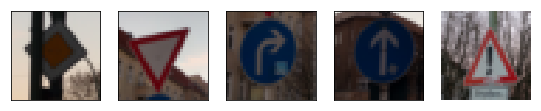

In [39]:
from PIL import Image
from scipy import ndimage, misc

imgs = [ 'signs/2_sign.png', 'signs/4_sign.png', 'signs/5_sign.png', 'signs/6_sign.png', 'signs/7_sign.png']
y_new = [12,13,33,35,18]
new_images = []

for imgname in imgs:
    image = ndimage.imread(imgname, mode="RGB")
    image_resized = misc.imresize(image, (32, 32))
    new_images.append(image_resized)

print(len(new_images))
print('New Images loaded successfully!!')

X_new = np.array(new_images)

display_images_grid(X_new)

### Predict the Sign Type for Each Image

In [40]:
  
def predict_new(params, X):
    graph = tf.Graph()
    with graph.as_default():
        with tf.variable_scope("predict"):
            tf_x = tf.placeholder(tf.float32, shape=(None, 32, 32, 1))
            is_training = tf.placeholder(tf.bool)

    with tf.Session(graph=graph) as sess:
        sess.run(tf.global_variables_initializer())
        # Input data. For the training data, we use a placeholder that will be fed at run time with a training minibatch.

        predictions = tf.nn.softmax(network(params, tf_x, is_training))
        tf.train.Saver().restore(sess, "net/" + params.save_file)
        [p] = sess.run([predictions], feed_dict={tf_x: X, is_training: False})
        return np.array(p)




def preprocess_new(params, X):
    if params.range_0_1:
        X = make_range_0_1(X)
        X = equalize_histogram(X)

    if params.convert_to_greyscale:
        X = convert_to_greyscale(X)

    return X

X_new = preprocess_new(params, X_new)
predictions = predict_new(params, X_new)
np.argmax(predictions, 1)
for p in np.argmax(predictions, 1):
    print(sign_names[p])

C:\Users\dmitr\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint16
  "%s to %s" % (dtypeobj_in, dtypeobj))


Priority road
Yield
Turn right ahead
Ahead only
General caution


### Analyze Performance

In [41]:
accuracy = 100.0 * np.sum(np.argmax(predictions, 1) == y_new) / predictions.shape[0]
print(accuracy)

100.0


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

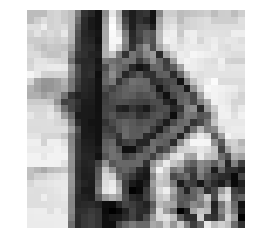

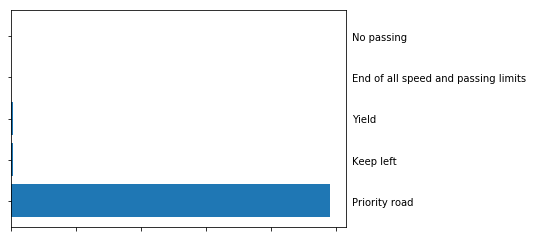

---------------------------------------------------------------------------------------------------



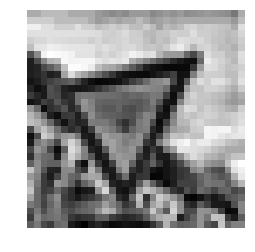

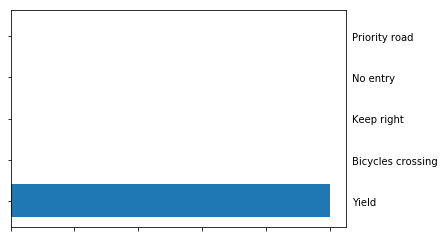

---------------------------------------------------------------------------------------------------



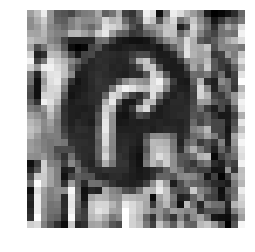

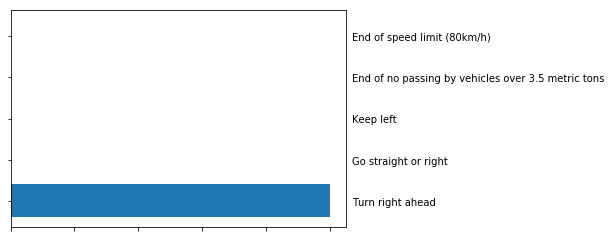

---------------------------------------------------------------------------------------------------



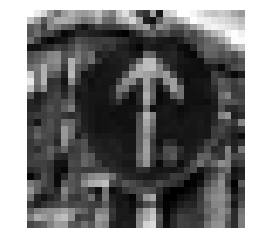

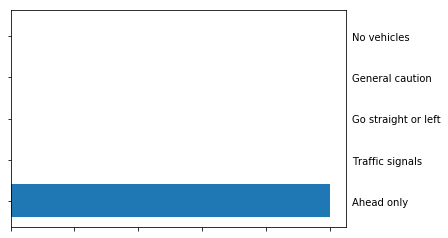

---------------------------------------------------------------------------------------------------



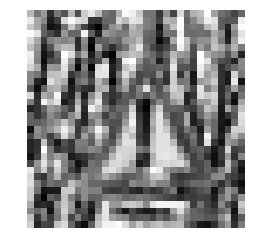

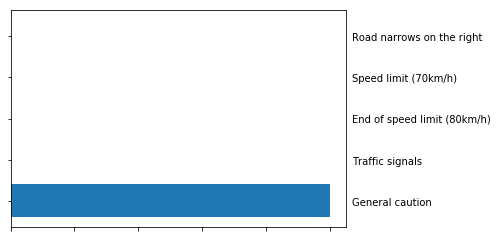

---------------------------------------------------------------------------------------------------



In [43]:
def get_top_k_predictions(params, X, k=5):
    graph = tf.Graph()
    with graph.as_default():
        with tf.variable_scope("top_knn_5"):
            tf_x = tf.placeholder(tf.float32, shape=(None, 32, 32, 1))
            is_training = tf.placeholder(tf.bool)

    with tf.Session(graph=graph) as sess:
        sess.run(tf.global_variables_initializer())
        # Input data. For the training data, we use a placeholder that will be fed at run time with a training minibatch.

        predictions = tf.nn.softmax(network(params, tf_x, is_training))
        top_k_predictions = tf.nn.top_k(predictions, k)
        tf.train.Saver().restore(sess, "net/" + params.save_file)
        [p] = sess.run([top_k_predictions], feed_dict={tf_x: X, is_training: False})
        return np.array(p)
    
def plot_image_statistics(X, predictions, index):

    preprocessed = X[index].reshape(32, 32)
    plt.imshow(preprocessed, cmap='gray')
    plt.axis('off')
    plt.show()

    plt.barh(np.arange(5) + .5, predictions[0][index], align='center')
    plt.yticks(np.arange(5) + .5, sign_names[predictions[1][index].astype(int)])
    plt.tick_params(axis='both', which='both', labelleft='off', labelright='on', labeltop='off', labelbottom='off')

    plt.show()
    
predictions = get_top_k_predictions(params, X_new)

for i in range(len(new_images)):
    plot_image_statistics(X_new, predictions, i)
    print("---------------------------------------------------------------------------------------------------\n")    

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 